## Reproduce Figure 7 in my eNeuro Paper ##

Inspired by Gelman & Nolan, Teaching Statistics (A Bag of Tricks), 8.3.2, Real vs. fake coin flips. pp. 119-121

Tests students' intuition about random sequences. Idea is to divide class in half and have one group generate a sequence of
0s and 1s by actually tossing a coin 100 times and the other to come up with their own random sequence of 0s and 1s without using a coin or a rng.

RTB wrote MATLAB code, 10 September 2017, about to go searching for Memphre

Adapted for eNeuro piece on confirmation bias (figure 7) 23 September 2024

Translated to Python, with Chat-GPT assist, 07 October 2024

## Panel A ##
Generate a simulation of 50 coin tosses.

In [3]:
import random

# Define the coin sides
cStr = ['H', 'T']

# Simulate 50 coin tosses
y = random.choices(cStr, k=50)

# Display the result
print(''.join(y))

HHTHTTTTTHHHTTHHHHHTTHHHHTTTTTHTTTTTHHHTHTTHTHHTHH


## Panel B ##

Simulate tossing a fair coin 100 times. Then count the number of transitions (H-to-T or T-to-H) and count the number of runs of different lengths.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, nbinom

# Parameters for running simulation 2000 times
nSims = 2000
nTosses = 100
maxRunLength = 10
binCtrs = np.arange(1, maxRunLength + 1)

# Simulate random sequences of 0s and 1s
allTosses = np.round(np.random.rand(nTosses, nSims))

# Compute all transitions (switches between 0s and 1s)
allTransitions = np.abs(np.diff(allTosses, axis=0))
nTransitions = np.sum(allTransitions, axis=0)

# Initialize variables
maxRuns = np.zeros(nSims)
cumRunCounts = np.zeros(maxRunLength)

# Compute run counts and max runs for each simulation
for k in range(nSims):
    allRuns = np.diff(np.where(allTransitions[:, k])[0])
    runCounts, _ = np.histogram(allRuns, bins=np.arange(1, maxRunLength + 2))
    cumRunCounts += runCounts
    maxRuns[k] = np.max(allRuns) if len(allRuns) > 0 else 0

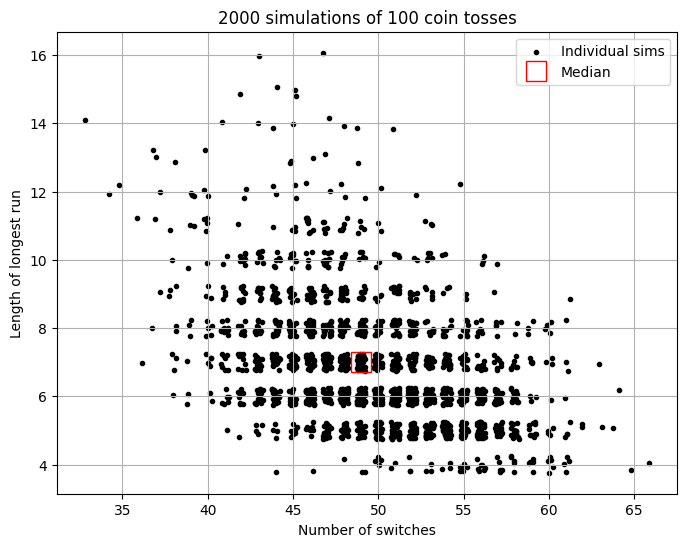

In [10]:
# Plot the results of the simulation

# Jitter variables randomly over [-0.25 to +0.25]
xJitter = ((np.random.rand(len(nTransitions)) - 0.5) / 2) + nTransitions
yJitter = ((np.random.rand(len(maxRuns)) - 0.5) / 2) + maxRuns

# Scatter plot with jitter
plt.figure(figsize=(8, 6))
plt.scatter(xJitter, yJitter, color='k', marker='.')
plt.plot(np.median(nTransitions), np.median(maxRuns), 'ks', markerfacecolor='none', markeredgecolor='red', markersize=15)
plt.xlabel('Number of switches')
plt.ylabel('Length of longest run')
plt.title(f'{nSims} simulations of {nTosses} coin tosses')
plt.legend(['Individual sims', 'Median'])
plt.grid(True)
plt.show()

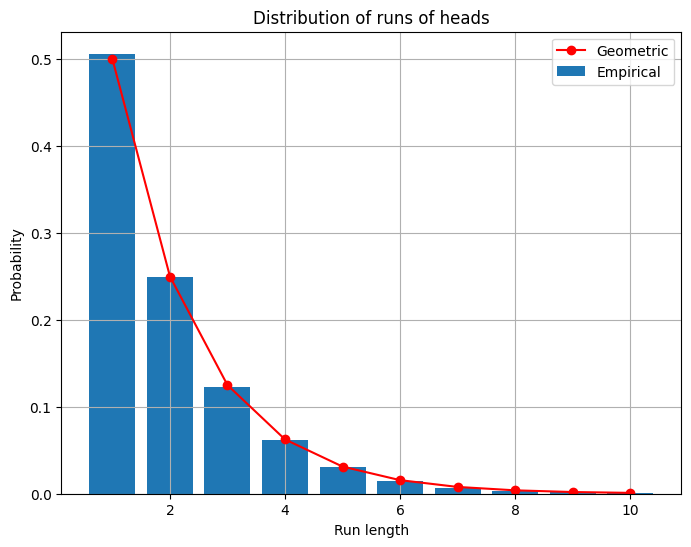

In [12]:
# Bar plot for run length distribution
plt.figure(figsize=(8, 6))
plt.bar(binCtrs, cumRunCounts / np.sum(cumRunCounts), label='Empirical')

# Geometric distribution
yVals = geom.pmf(binCtrs, 0.5)
plt.plot(binCtrs, yVals, 'ro-', markerfacecolor='r', label='Geometric')

plt.xlabel('Run length')
plt.ylabel('Probability')
plt.title('Distribution of runs of heads')
plt.legend()
plt.grid(True)
plt.show()